In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from fedot_ind.api.utils.path_lib import PROJECT_PATH

In [2]:
path_to_datasets = PROJECT_PATH + '/benchmark/results/ts_multi_classification'
path_to_results_2024 = PROJECT_PATH+'/benchmark/results/time_series_multI_clf_comparasion_241223.csv'
path_to_server_results_2024 = PROJECT_PATH+'/benchmark/results/server_results/ts_multi_classification'
clf_comp = pd.read_csv(path_to_results_2024, sep=';',decimal=',', index_col=0).astype(float)

In [3]:
for i in os.listdir(path_to_datasets):
    try:
        metric_report = Path(path_to_datasets, i, 'metrics_report.csv')
        data = pd.read_csv(metric_report, index_col=0)
        new_metric = float(data.loc[i, ['Fedot_Industrial']].values)
        if 'Fedot_Industrial_finetuned' in data.columns:
            new_metric_tuned = float(data.loc[i, ['Fedot_Industrial_finetuned']].values)
        else:
            new_metric_tuned = 0
        if i in os.listdir(path_to_server_results_2024):
            metric_report_server = Path(path_to_server_results_2024, i, 'metrics_report.csv')
            data_server = pd.read_csv(metric_report_server, index_col=0)
            new_metric_server = float(data_server.loc[i, ['Fedot_Industrial']].values)
        else:
            new_metric_server = 0
        old_metric = float(clf_comp.loc[i, ['Fedot_Industrial']].values)
        best_metric =  max(old_metric,new_metric_server,new_metric)
        print(f'-----------------------------------------------------\n'
              f'Result for dataset - {i}\n'
              f'old_metric - {old_metric}\n'
              f'new metric - {new_metric}\n'
               f'new metric_tuned - {new_metric_tuned}\n'
              f'server metric - {new_metric_server}\n'
              f'best_metric - {best_metric}\n'
              f'-----------------------------------------------------\n')
        clf_comp.loc[i, ['Fedot_Industrial']] = best_metric
        clf_comp.loc[i, ['Fedot_Industrial_finetuned']] = new_metric_tuned
    except Exception as e:
        print(f"{e}")
        print(f"{i}")

-----------------------------------------------------
Result for dataset - AtrialFibrillation
old_metric - 0.267
new metric - 0.3333333333333333
new metric_tuned - 0
server metric - 0.1333333333333333
best_metric - 0.3333333333333333
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - DuckDuckGeese
old_metric - 0.4
new metric - 0.66
new metric_tuned - 0
server metric - 0
best_metric - 0.66
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - EigenWorms
old_metric - 0.786
new metric - 0.8931297709923665
new metric_tuned - 0
server metric - 0
best_metric - 0.8931297709923665
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - ERing
old_metric - 0.926
new metric - 0.9222222222222224
new metric_tuned - 0.9222222222222224
server metric - 0.9185185185185184
best_

In [4]:
clf_comp['Fedot_Industrial_best'] = clf_comp.apply(lambda row: max(row.loc['Fedot_Industrial'],row.loc['Fedot_Industrial_finetuned']), axis=1)
del clf_comp['Fedot_Industrial'], clf_comp['Fedot_Industrial_finetuned']

In [5]:
def categorize_dataset(metric):
    if metric < 5:
        return 'Easy to solve dataset'
    elif 5 < metric < 10:
        return 'Normal to solve dataset'
    elif 10 < metric < 15:
        return 'Hard to solve dataset'
    else:
        return 'Extraordinary Hard to solve dataset'

In [6]:
model_df = clf_comp
model_df.mean().sort_values(ascending=True)

DTW_I                    0.592154
RISE                     0.650269
TSF                      0.651077
DTW_D                    0.653808
CBOSS                    0.656500
DTW_A                    0.663680
ResNet                   0.668462
gRSF                     0.675269
TapNet                   0.679450
STC                      0.700885
TDE                      0.703115
HC1                      0.710692
Arsenal                  0.715462
InceptionTime            0.716700
ROCKET                   0.724269
mrseql                   0.724600
CIF                      0.726000
Fedot_Industrial_best    0.731862
DrCIF                    0.732385
MUSE                     0.736350
HC2                      0.747846
dtype: float64

In [7]:
not_stable_models = []

In [8]:
stable_models = [x for x in clf_comp.columns if x not in not_stable_models]
clf_comp['Difference %'] = (-(clf_comp.iloc[:, :-1].max(axis=1) - clf_comp['Fedot_Industrial_best']) / max(clf_comp.iloc[:, :-1].max(axis=1).values[0],clf_comp.iloc[:, :-2].mean(axis=1).values[0])) * 100
clf_comp['Metric dispersion by dataset'] = (clf_comp.iloc[:, :-2].std(axis=1)/clf_comp.iloc[:, :-2].max(axis=1))*100
clf_comp['dataset_category'] = clf_comp['Metric dispersion by dataset'].apply(categorize_dataset)
#clf_comp = clf_comp[clf_comp['Fedot_Industrial']!=0]

In [10]:
clf_comp

,Arsenal,CBOSS,CIF,DrCIF,DTW_A,DTW_D,DTW_I,gRSF,HC1,HC2,...,RISE,ROCKET,STC,TapNet,TDE,TSF,Fedot_Industrial_best,Difference %,Metric dispersion by dataset,dataset_category
BasicMotions,1.000,1.000,1.000,1.000,1.000,0.975,0.725,1.000,1.000,1.000,...,1.000,1.000,0.975,1.000,1.000,1.000,1.000000,-0.000000,6.261831,Normal to solve dataset
Cricket,1.000,0.986,0.986,0.986,1.000,1.000,0.958,0.986,0.986,1.000,...,0.986,1.000,0.986,1.000,0.986,0.931,1.000000,-0.000000,1.619771,Easy to solve dataset
LSST,0.642,0.435,0.573,0.556,0.567,0.551,0.490,0.588,0.575,0.643,...,0.509,0.637,0.587,0.513,0.570,0.350,0.688000,4.500000,11.632272,Hard to solve dataset
FingerMovements,0.530,0.480,0.520,0.600,0.510,0.530,0.510,0.580,0.550,0.530,...,0.560,0.540,0.510,0.470,0.560,0.580,0.590000,-1.000000,5.657759,Normal to solve dataset
HandMovementDirection,0.473,0.189,0.595,0.527,0.203,0.189,0.189,0.419,0.446,0.473,...,0.297,0.514,0.392,0.338,0.378,0.486,0.541000,-5.400000,21.047922,Extraordinary Hard to solve dataset
NATOPS,0.883,0.861,0.856,0.844,0.883,0.883,0.817,0.844,0.889,0.894,...,0.839,0.889,0.872,0.811,0.839,0.800,0.961000,-1.700000,4.559055,Easy to solve dataset
PenDigits,0.983,0.908,0.967,0.977,0.977,0.977,0.973,0.935,0.934,0.979,...,0.832,0.983,0.941,0.856,0.935,0.892,0.986000,-0.200000,4.494429,Easy to solve dataset
RacketSports,0.901,0.882,0.882,0.901,0.842,0.803,0.849,0.882,0.888,0.908,...,0.809,0.895,0.888,0.875,0.836,0.888,0.908000,-2.000000,3.546466,Easy to solve dataset
Heartbeat,0.741,0.722,0.780,0.790,0.693,0.717,0.615,0.761,0.722,0.732,...,0.732,0.746,0.722,0.790,0.746,0.741,0.780000,-1.000000,6.502006,Normal to solve dataset
AtrialFibrillation,0.133,0.267,0.333,0.333,0.267,0.200,0.267,0.267,0.133,0.267,...,0.267,0.067,0.267,0.200,0.267,0.200,0.333333,-6.666667,19.569692,Extraordinary Hard to solve dataset


# Compute ranks

In [11]:
clear_csv = clf_comp.iloc[:, :-2]
pd.DataFrame(clear_csv.rank(axis=1, ascending=False).mean(axis=0).sort_values(), columns=['mean rank'])

,mean rank
HC2,5.525
ROCKET,6.375
Arsenal,7.500
DrCIF,8.200
MUSE,8.700
CIF,8.800
Fedot_Industrial,9.150
HC1,10.375
TDE,10.500
mrseql,10.675


Fedot.ind has mean rank 9.1. It's the 7'th place comparing with SOTA

In [12]:
top_1 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(1)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-1']).fillna(0)
top_3 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(3)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-3'])
top_5 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(5)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-5'])
top_half = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(7)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-half'])
pd.concat([top_1, top_3, top_5, top_half], axis=1).fillna(0)

,top-1,top-3,top-5,top-half
Arsenal,4.0,5.0,10.0,12
DrCIF,3.0,7.0,9.0,12
InceptionTime,2.0,3.0,3.0,5
MUSE,2.0,3.0,7.0,9
ROCKET,2.0,4.0,9.0,14
ResNet,2.0,4.0,6.0,9
CBOSS,1.0,2.0,3.0,4
CIF,1.0,5.0,9.0,11
Difference %,1.0,1.0,1.0,1
STC,1.0,2.0,3.0,3


In [48]:
groupby_df = clf_comp.groupby(by = 'dataset_category').mean()
groupby_df= groupby_df.iloc[:,:-2]
groupby_df['Difference in each category %'] = (groupby_df['Fedot_Industrial']-groupby_df.iloc[:, :-1].max(axis=1))*100
groupby_df['Difference in each category %']

dataset_category
Easy to solve dataset                  -0.842857
Extraordinary Hard to solve dataset   -13.940000
Hard to solve dataset                   4.500000
Normal to solve dataset                -2.928571
Name: Difference in each category %, dtype: float64

# Rank Distribution

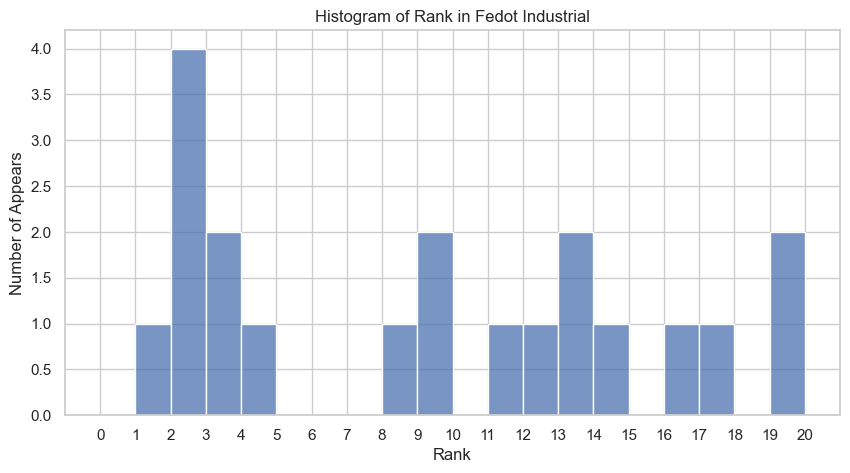

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=False) 
bins = np.arange(clear_csv.shape[1])
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(quantiles.loc[:, 'Fedot_Industrial'], bins=bins)

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Number of Appears')
plt.xticks(bins)
plt.title('Histogram of Rank in Fedot Industrial')

# Show the plot
plt.show()

For multivariate time series Fedot ind has more smoothed distribution 

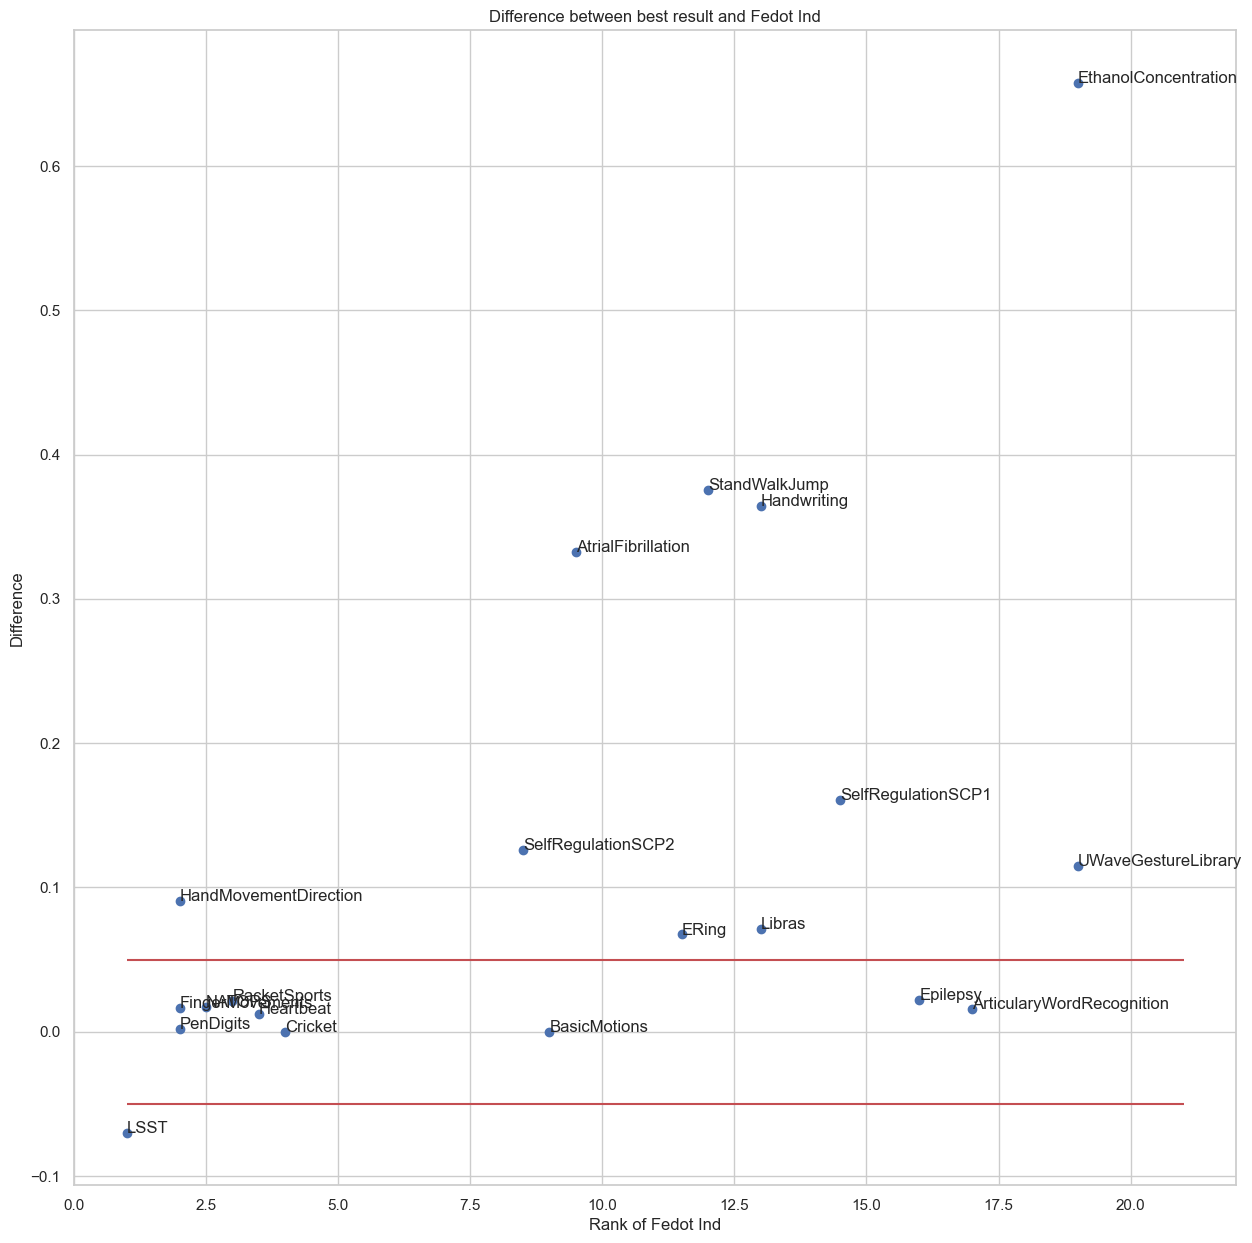

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=False) 
differences_from_first_place = (clear_csv.iloc[:, :-1].max(axis=1) - clear_csv['Fedot_Industrial']) / clear_csv.iloc[:, :-1].max(axis=1)
# Set the style of the plot
sns.set(style="whitegrid")
plt.yticks(np.arange(-0.4, 1, 0.1))

# Create a histogram with seaborn
plt.scatter(quantiles.loc[:, 'Fedot_Industrial'], differences_from_first_place)
for i in range(len(quantiles.loc[:, 'Fedot_Industrial'])):
    plt.annotate(clf_comp.index.values[i], (quantiles.loc[:, 'Fedot_Industrial'].values[i], differences_from_first_place.values[i]))

plt.hlines(y = 0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
plt.hlines(y = -0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
# Add labels and title
plt.xlabel('Rank of Fedot Ind')
plt.ylabel('Difference')
plt.title('Difference between best result and Fedot Ind')

# Show the plot
plt.show()

# Poor solutions

In [76]:
poor_idx = clf_comp.sort_values(by='Difference %', ascending=False).iloc[:5, :].index.values
poor_idx

array(['EthanolConcentration', 'StandWalkJump', 'Handwriting',
       'AtrialFibrillation', 'SelfRegulationSCP1'], dtype=object)

EthanolConcentration
EthanolConcentration


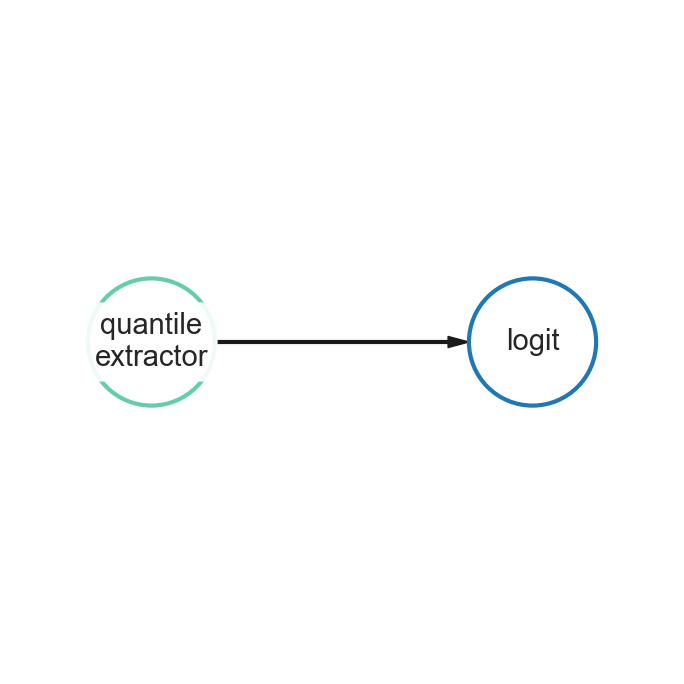

StandWalkJump
For StandWalkJump no results!
Handwriting
For Handwriting no results!
AtrialFibrillation
For AtrialFibrillation no results!
SelfRegulationSCP1
SelfRegulationSCP1


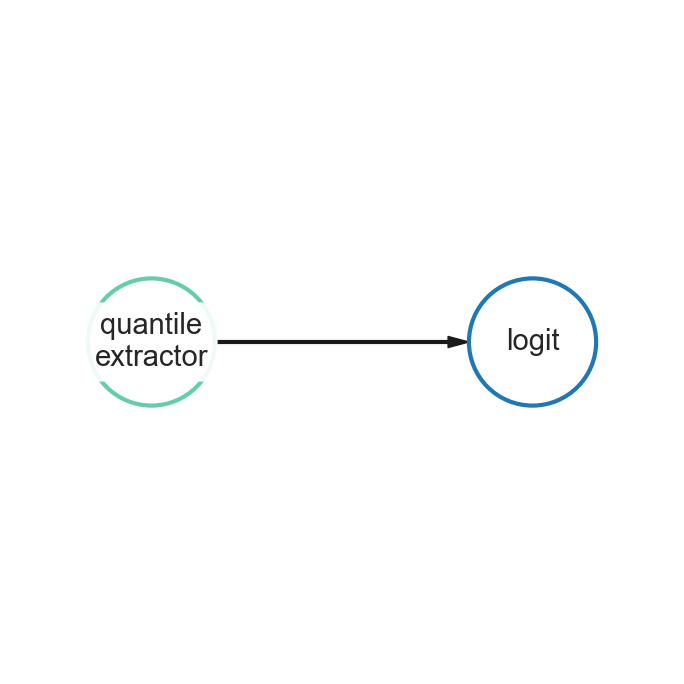

In [77]:
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
prefix = 'pipeline_saved'
for idx in poor_idx:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        print(idx)
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')
        continue

# Good solutions

In [78]:
good_idx = clf_comp.sort_values(by='Difference %', ascending=True).iloc[:5, :].index.values
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
for idx in good_idx:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')

LSST
For LSST no results!
BasicMotions
For BasicMotions no results!
Cricket
For Cricket no results!
PenDigits
For PenDigits no results!
Heartbeat
For Heartbeat no results!
